# CIFAR 10 - Categorical Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [2]:
import tensorflow

tensorflow.__version__

'2.9.2'

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


# II. Data Preprocessing

> ## 1) Normalization

In [6]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


> ## 2) One Hot Encoding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


# III. Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - CNN & DNN

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

* 모델 구조 확인

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

> ## 2) Model Compile

* 모델 학습방법 설정

In [12]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 5분

In [13]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 11s 9ms/step - loss: 1.7663 - accuracy: 0.3478 - val_loss: 1.5977 - val_accuracy: 0.4332
Epoch 2/100
313/313 [==============================] - 2s 7ms/step - loss: 1.4173 - accuracy: 0.4848 - val_loss: 1.3037 - val_accuracy: 0.5384
Epoch 3/100
313/313 [==============================] - 2s 7ms/step - loss: 1.2818 - accuracy: 0.5380 - val_loss: 1.2865 - val_accuracy: 0.5526
Epoch 4/100
313/313 [==============================] - 2s 7ms/step - loss: 1.1806 - accuracy: 0.5816 - val_loss: 1.1092 - val_accuracy: 0.6037
Epoch 5/100
313/313 [==============================] - 2s 7ms/step - loss: 1.1112 - accuracy: 0.6079 - val_loss: 1.0199 - val_accuracy: 0.6410
Epoch 6/100
313/313 [==============================] - 2s 7ms/step - loss: 1.0504 - accuracy: 0.6271 - val_loss: 1.0000 - val_accuracy: 0.6457
Epoch 7/100
313/313 [==============================] - 2s 7ms/step - loss: 1.0059 - accuracy: 0.6461 - val_loss: 1.0221 - val_accuracy: 0.641

> ## 4) 학습 결과 시각화

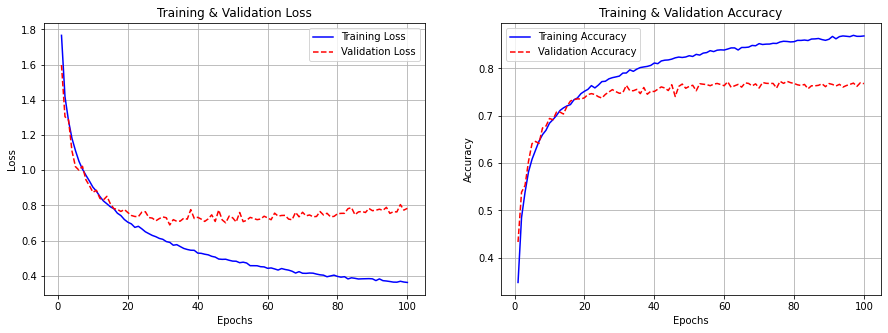

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_model.history['loss'], 'b-')
plt.plot(epochs, Hist_model.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_model.history['accuracy'], 'b-')
plt.plot(epochs, Hist_model.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 0.8208 - accuracy: 0.7556
Loss = 0.82078
Accuracy = 0.75560


# 
# 
# 
# The End
# 
# 
# 